# Phase Diagram and Flow Field for Neural Network Model (Figure 3C)

This Jupyter Notebook generates Figure 3C for a neural network model in the (wEE, wES) parameter space.

- **Figure 3C**: A phase diagram with a flow field, showing stability boundaries and parameter dynamics. Flow field arrows are displayed only above the stability boundary, excluding the topmost and bottommost rows.

**Dependencies**: Python 3.6+, numpy, matplotlib  
**Author**: Yingming Pei  
**Date**: 2025-05-13  
**Output**: Saves figure as 'Phase_Diagram_FlowField_Fig3C.pdf'

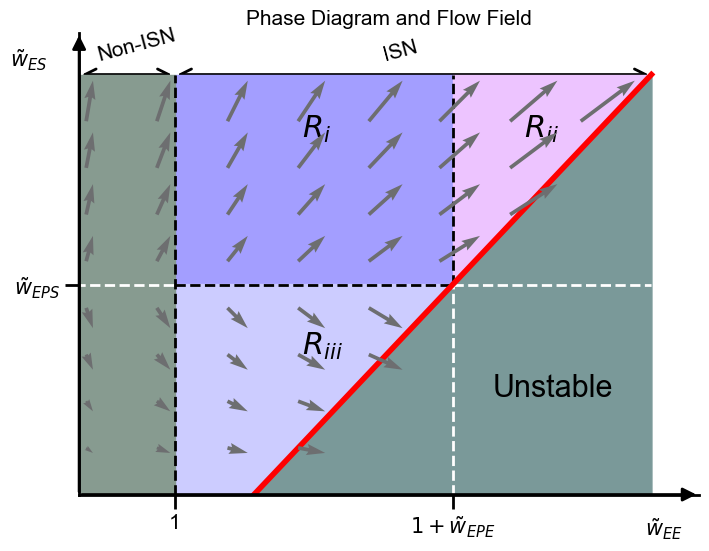

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Function to configure matplotlib plotting settings
def configure_plot_style():
    """Configure global matplotlib settings for consistent figure styling."""
    plt.rcParams["axes.spines.top"] = False
    plt.rcParams["axes.spines.right"] = False
    plt.rcParams["axes.linewidth"] = 2
    plt.rcParams["lines.linewidth"] = 2
    plt.rcParams["xtick.major.size"] = 10
    plt.rcParams["xtick.major.width"] = 2
    plt.rcParams["ytick.major.size"] = 10
    plt.rcParams["ytick.major.width"] = 2
    plt.rcParams["xtick.minor.size"] = 5
    plt.rcParams["xtick.minor.width"] = 2
    plt.rcParams["ytick.minor.size"] = 5
    plt.rcParams["ytick.minor.width"] = 2
    plt.rcParams["xtick.labelsize"] = 20
    plt.rcParams["ytick.labelsize"] = 20
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["legend.fontsize"] = 20
    plt.rcParams["axes.titlesize"] = 20
    plt.rcParams["font.size"] = 20
    plt.rcParams["font.family"] = "Arial"

# Define dynamics functions for flow field
def dEE_dt(WEE, I_increase=0.5):
    """Calculate time derivative of wEE."""
    return WEE * (1 + I_increase)

def dES_dt(WES, I_increase=0.5):
    """Calculate time derivative of wES, with conditional dynamics."""
    return np.where(WES < 1.5, -WES * (1 + I_increase), WES * (1 + I_increase))

# Set up figure and axes
fig, ax = plt.subplots(figsize=(8, 6))
configure_plot_style()

# Plot dashed lines for boundaries
ax.plot([1, 1], [0, 3], color='black', linestyle='--')
ax.plot([11/4, 11/4], [0, 1.5], color='white', linestyle='--')
ax.plot([11/4, 11/4], [1.5, 3], color='black', linestyle='--')
ax.plot([0, 1], [1.5, 1.5], color='white', linestyle='--')
ax.plot([1, 11/4], [1.5, 1.5], color='black', linestyle='--')
ax.plot([11/4, 4], [1.5, 1.5], color='white', linestyle='--')

# Plot stability boundary
ax.plot([1.5, 4], [0, 3], color='red', linestyle='-', 
        linewidth=4, label='Stability Boundary')

# Add arrows for parameter regions
arrow_1 = FancyArrowPatch((0.4, 3), (1, 3), arrowstyle='<->', mutation_scale=20, 
                          color='black', linewidth=2)
arrow_2 = FancyArrowPatch((1, 3), (4, 3), arrowstyle='<->', mutation_scale=20, 
                          color='black', linewidth=2)
ax.add_patch(arrow_1)
ax.add_patch(arrow_2)

# Fill regions with distinct colors
ax.fill([11/4, 11/4, 1, 1], [1.5, 3, 3, 1.5], color=(0.639, 0.620, 1.0))  # Region Ri
ax.fill([1, 1, 11/4, 1.5], [0, 1.5, 1.5, 0], color=(0.8, 0.8, 1.0))  # Region Riii
ax.fill([11/4, 11/4, 4], [1.5, 3, 3], color=(0.929, 0.769, 1.0))  # Region Rii
ax.fill_between([1.5, 4, 4], [0, 3, 0], color=(0.478, 0.6, 0.6))  # Unstable region
ax.fill([0, 0, 1, 1], [0, 3, 3, 0], color='#879b90')  # Non-ISN region

# Add text labels for regions and annotations
ax.text(1.8, 2.55, r'$R_i$', fontsize=22)
ax.text(3.2, 2.55, r'$R_{ii}$', fontsize=22)
ax.text(1.8, 1.0, r'$R_{iii}$', fontsize=22)
ax.text(3.0, 0.7, 'Unstable', fontsize=22)
ax.text(0.5, 3.1, 'Non-ISN', fontsize=15, rotation=15)
ax.text(2.3, 3.1, 'ISN', fontsize=15, rotation=15)

# Configure axes
ax.set_xlim([0.4, 4.3])
ax.set_ylim([0, 3.3])
ax.set_title('Phase Diagram and Flow Field', fontsize=15)
ax.text(4.2, -0.15, r'$\tilde{w}_{EE}$', fontsize=15, ha='right', va='top')
ax.text(0.2, 3.2, r'$\tilde{w}_{ES}$', fontsize=15, ha='right', va='top')

# Set custom ticks and labels
wEE_star_sim = 11/4
ax.set_xticks([1, wEE_star_sim])
ax.set_xticklabels(['1', r'$1+\tilde{w}_{EPE}$'], fontsize=15)
ax.set_yticks([1.5])
ax.set_yticklabels([r'$\tilde{w}_{EPS}$'], fontsize=15)

# Add coordinate axes with arrows
ax.annotate('', xy=(4.3, 0), xytext=(0.4, 0), 
            arrowprops=dict(facecolor='black', linewidth=2, arrowstyle='-|>'))
ax.annotate('', xy=(0.4, 3.3), xytext=(0.4, 0), 
            arrowprops=dict(facecolor='black', linewidth=2, arrowstyle='-|>'))

# Generate flow field
WEE = np.linspace(0, 4, 10)
WES = np.linspace(0, 3, 10)
WEE, WES = np.meshgrid(WEE, WES)
dEE = dEE_dt(WEE)
dES = dES_dt(WES)

# Mask arrows below stability boundary (WES < 1.2 * (WEE - 1.5))
mask = (WES <= 1.2 * (WEE - 1.5)) | (WES == WES.max()) | (WES == WES.min())
dEE = np.where(mask, np.nan, dEE)
dES = np.where(mask, np.nan, dES)
ax.quiver(WEE, WES, dEE, dES, color='#6d6e70', zorder=10)

# Save figure as high-quality PDF for publication
# plt.savefig('Phase_Diagram_FlowField.pdf', format='pdf', dpi=400, bbox_inches='tight')

# Display plot
plt.show()